<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="http://introtodeeplearning.com/images/colab/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/aamini/introtodeeplearning_labs/blob/master/lab1/Part1_tensorflow.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/aamini/introtodeeplearning_labs/blob/master/lab1/Part1_tensorflow.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Lab 1: Intro to TensorFlow and Music Generation with RNNs
# Part 1: Intro to TensorFlow

## 0.1 Install TensorFlow

TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow.

Let's install TensorFlow and a couple of dependencies: 


In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

We'll then check to make sure things installed properly:

In [0]:
is_correct_tf_version = '1.13.' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version {} installed".format(tf.__version__)

is_eager_enabled = tf.executing_eagerly()
assert is_eager_enabled,      "Tensorflow eager mode is not enabled"

TensorFlow is set to release the next major version of TensorFlow, [TensorFlow 2.0](https://www.tensorflow.org/community/roadmap#tensorflow_20_is_coming), very soon. In this set of labs we'll be working in TensorFlow 1.12.0. The 6.S191 team is **Eager** to show you this version, as it features a (relatively) new imperative programming style called Eager execution. Under Eager execution, TensorFlow operations execute immediately as they're called from Python (which wasn't always the case!). This allows for fast debugging and a more intuitive way to get started with TensorFlow.



## 1.1 The computation graph

TensorFlow is called TensorFlow because it handles the flow (node/mathematical operation) of Tensors (data), which you can think of as multidimensional arrays. In TensorFlow, computations can be thought of as graphs. First, we'll explore defining a computational graph with Tensors and mathematical operations before diving in to how we can build deep learning models in TensorFlow. 

Let's look at a simple example, and define this computation using TensorFlow:

![alt text](img/add-graph.png "Computation Graph")

<!-- Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

User friendly
Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
Modular and composable
Keras models are made by connecting configurable building blocks together, with few restrictions.
Easy to extend
Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models. -->
<!-- 
TensorFlow programs are usually structured into a phase that assembles a graph, and a phase that uses a session to execute operations in the graph. In TensorFlow we define the computational graph with Tensors and mathematical operations to create a system for machine learning and deep learning.

We can think of a computation graph as a series of math operations that occur in some order.  -->


In [3]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15, name="a")
b = tf.constant(61, name="b")

# Add them!
c = tf.add(a,b, name="c")
print(c)

tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result. That's because of Eager!

### Building a computation graph

Now let's consider a slightly more complicated computation graph:
![alt text](img/computation-graph.png "Computation Graph")

This graph takes two inputs, `a, b`, and computes an output `e`. Each node in the graph is an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation graph:

In [0]:
# Construct a simple computation graph
def graph(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a, b)
  d = tf.subtract(b, 1)
  e = tf.multiply(c, d)
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [6]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = graph(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Again, notice how our output is a Tensor with value defined by the output of the computation (thanks to Eager!).

## 1.2 Neural networks in TensorFlow
We can also define neural networks in TensorFlow, and it's often helpful to think about this using the idea of computation graphs. TensorFlow uses a high-level API called [Keras](https://www.tensorflow.org/guide/keras) that provides a powerful, intuitive framework for building and training deep learning models. In the 6.S191 labs we'll be using the Keras API to build and train our models.

Let's consider this example of a very simple neural network of just one dense layer:

![alt text](img/computation-graph-2.png "Computation Graph")

This graph takes an input `x` and computes an output `out`. It does so how we learned in lecture today: `out = sigmoid(W*x+b)`.

First, let's define this computation graph in TensorFlow via a simple function, as we did before:

In [0]:
# n_in: number of inputs
# n_out: number of outputs
def our_dense_layer(x, n_in, n_out):
  # Define and initialize parameters, a weight matrix W and biases b
  W = tf.Variable(tf.ones((n_in, n_out)))
  b = tf.Variable(tf.zeros((1, n_out)))
  
  '''TODO: define the operation for z (hint: use tf.matmul)'''
  z = tf.add(tf.multiply(x, W), b)
  
  '''TODO: define the operation for out (hint: use tf.sigmoid)'''
  out = tf.sigmoid(z)
  return out

As before, we can define an example input, feed it into `our_dense_layer` function, and immediately execute:

In [27]:
'''TODO: define an example input x_input'''
x_input = tf.constant([[1.0, 2, 3]], shape = (1, 3))
'''TODO: call `our_dense_layer` to get the output of the network and print the result!'''
our_dense_layer(x_input, 2, 3) # TODO

<tf.Tensor: id=397, shape=(2, 3), dtype=float32, numpy=
array([[0.7310586 , 0.8807971 , 0.95257413],
       [0.7310586 , 0.880797  , 0.95257413]], dtype=float32)>

Now, instead of explicitly defining a simple function, we'll use the Keras API to define our neural network. This will be especially important as we move on to more complicated network architectures. 

Specifically, for this network we'll use the Keras [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) model from the `tf.keras` API to define our network. The `tf.keras.Sequential` model lets us conveniently define a linear stack of network layers. We'll use [`tf.keras.layers.Dense` ](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) to define our single fully connected network layer. 

In [0]:
# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# First define the model 
model = Sequential()


'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
dense_layer = Dense(n_output_nodes, input_shape = (n_input_nodes,), activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)


In [31]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
print(model(x_input))

tf.Tensor([[0.57439446 0.48251432 0.25718245]], shape=(1, 3), dtype=float32)


## 1.3 Automatic differentiation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)
is one of the most important parts of TensorFlow and is the backbone of training with 
[backpropagation](https://en.wikipedia.org/wiki/Backpropagation). During Eager execution, use `tf.GradientTape` to trace operations for computing gradients later. 

All forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards and then discarded. A particular `tf.GradientTape` can only
compute one gradient; subsequent calls throw a runtime error.

Let's take a look at a simple example! We can use automatic differentiation and stochastic gradient descent (SGD) to find the minimum of $y=(x-1)^2$. While we can clearly solve this problem analytically ($x_{min}=1$), solving this simple example sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses. 

Initializing x=[[1.5984101]]


Text(0, 0.5, 'x value')

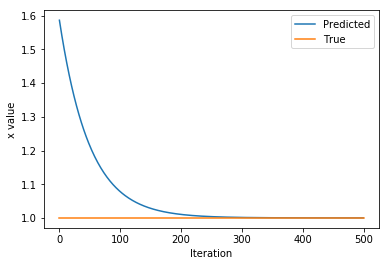

In [33]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))
learning_rate = 1e-2
history = []

for i in range(500):
  with tf.GradientTape() as tape:
    y = (x - 1)**2 # record the forward pass on the tape

  grad = tape.gradient(y, x) # compute the gradient of y with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0, 500],[1,1])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

## 1.4 Control flow

As you've seen, TensorFlow now an imperative programming style, and that's all because of Eager. 

As another example of the power of Eager, let's take a look at how we can build a dynamic model that uses Python flow control. Here's an example of the [Collatz conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture) using TensorFlow’s arithmetic operations. Such dynamic behavior is not possible in past versions of TensorFlow (up to v1.4)!

In [34]:
a = tf.constant(12)
counter = 0
while not tf.equal(a, 1):
  if tf.equal(a % 2, 0):
    a = a / 2
  else:
    a = 3 * a + 1
  print(a)

tf.Tensor(6.0, shape=(), dtype=float64)
tf.Tensor(3.0, shape=(), dtype=float64)
tf.Tensor(10.0, shape=(), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor(16.0, shape=(), dtype=float64)
tf.Tensor(8.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)
tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
